# Introduction

Since their introduction more than a century ago, normative growth charts have become fundamental tools in pediatric medicine and also in many other areas of anthropometry ([@bib5]). They provide the ability to quantify individual variation against centiles of variation in a reference population, which shifts focus away from group-level (e.g., case-control) inferences to the level of the individual. This idea has been adopted and generalized in clinical neuroimaging, and normative modeling is now established as an effective technique for providing inferences at the level of the individual in neuroimaging studies ([@bib27]; [@bib28]).

Although normative modeling can be used to estimate many different kinds of mappings—for example between behavioral scores and neurobiological readouts—normative models of brain development and aging are appealing considering that many brain disorders are grounded in atypical trajectories of brain development ([@bib19]) and the association between cognitive decline and brain tissue in aging and neurodegenerative diseases ([@bib20]; [@bib22]). Indeed, normative modeling has been applied in many different clinical contexts, including charting the development of infants born pre-term ([@bib8]) and dissecting the biological heterogeneity across cohorts of individuals with different brain disorders, including schizophrenia, bipolar disorder, autism, and attention-deficit/hyperactivity disorder ([@bib3]; [@bib46]; [@bib47]).

A hurdle to the widespread application of normative modeling is a lack of well-defined reference models to quantify variability across the lifespan and to compare results from different studies. Such models should: (1) accurately model population variation across large samples; (2) be derived from widely accessible measures; (3) provide the ability to be updated as additional data come online, (4) be supported by easy-to-use software tools, and (5) should quantify brain development and aging at a high spatial resolution, so that different patterns of atypicality can be used to stratify cohorts and predict clinical outcomes with maximum spatial precision. Prior work on building normative modeling reference cohorts ([@bib4]) has achieved some of these aims (1–4), but has modeled only global features (i.e., total brain volume), which is useful for quantifying brain growth but has limited utility for the purpose of stratifying clinical cohorts (aim 5). The purpose of this paper is to introduce a set of reference models that satisfy all these criteria.

To this end, we assemble a large neuroimaging data set ([Table 1](#table1)) from 58,836 individuals across 82 scan sites covering the human lifespan (aged 2–100, [Figure 1A](#fig1)) and fit normative models for cortical thickness and subcortical volumes derived from Freesurfer (version 6.0). We show the clinical utility of these models in a large transdiagnostic psychiatric sample (N=1985, [Figure 2](#fig2)). To maximize the utility of this contribution, we distribute model coefficients freely along with a [set of software tools](https://github.com/predictive-clinical-neuroscience/braincharts) to enable researchers to derive subject-level predictions for new data sets against a set of common reference models.

table: Table 1.
:::
## Sample description and demographics.

mQC refers to the manual quality checked subset of the full sample. ‘All’ rows=Train+Test. Clinical refers to the transdiagnostic psychiatric sample (diagnostic details in [Figure 2A](#fig2)).

|          |               | N (subjects) | N (sites) | Sex (%F/%M) | Age (Mean, S.D) |
| -------- | ------------- | ------------ | --------- | ----------- | --------------- |
| Full     | All           | 58,836       | 82        |             |                 |
|          | Training set  | 29,418       | 82        | 51.1/48.9   | 46.9, 24.4      |
|          |  Test set     | 29,418       | 82        | 50.9/49.1   | 46.9, 24.4      |
| mQC      | All           | 24,354       | 59        |             |                 |
|          |  Training set | 12,177       | 59        | 50.2/49.8   | 30.2, 24.1      |
|          | Test set      | 12,177       | 59        | 50.4/49.4   | 30.1, 24.2      |
| Clinical | Test set      | 1985         | 24        | 38.9/61.1   | 30.5, 14.1      |
| Transfer | Test set      | 546          | 6         | 44.5/55.5   | 24.8, 13.7      |
:::
{#table1}



figure: Figure 1.
:::
![](elife-72904.xml.media/fig1.jpg)

## Normative model overview.

(**A**) Age density distribution (x-axis) of each site (y-axis) in the full model train and test, clinical, and transfer validation set. (**B**) Age count distribution of the full sample (N=58,836). (**C, D**) Examples of lifespan trajectories of brain regions. Age is shown on x-axis and predicted thickness (or volume) values are on the y-axis. Centiles of variation are plotted for each region. In (**C**), we show that sex differences between females (red) and males (blue) are most pronounced when modeling large-scale features such as mean cortical thickness across the entire cortex or total gray matter volume. These sex differences manifest as a shift in the mean in that the shape of these trajectories is the same for both sexes, as determined by sensitivity analyses where separate normative models were estimated for each sex. The explained variance (in the full test set) of the whole cortex and subcortex is highlighted inside the circle of (**D**). All plots within the circle share the same color scale. Visualizations for all ROI trajectories modeled are shared on GitHub for users that wish to explore regions not shown in this figure.
:::
{#fig1}

In [10]:
# Import required packages
import pandas as pd
import numpy as np
import joypy
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load file containing ages and site labels
age = pd.read_csv('docs/all_age.csv')

In [12]:
# Separate each test set into its own dataframe
age_controls_tr = age.query('test_label == "controls train"')
age_controls_te = age.query('test_label == "controls test"')
age_patients = age.query('test_label == "patients"')
age_transfer = age.query('test_label == "transfer"')

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

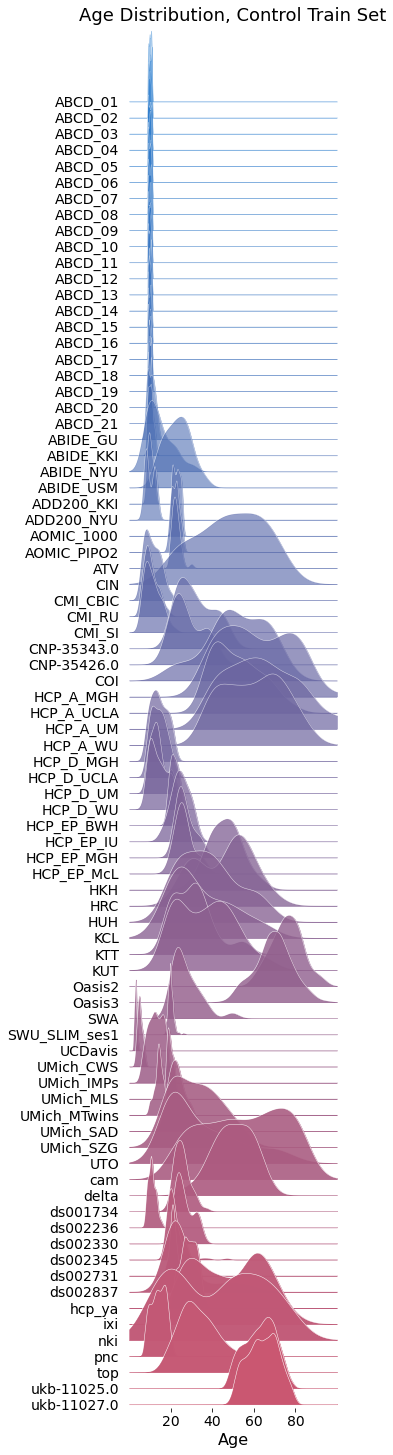

In [14]:
# Code for Figure 1A (train age)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)
plt.figure(dpi=380)
fig, axes = joypy.joyplot(age_controls_tr, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,20), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[0,100])
plt.title('Age Distribution, Control Train Set', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

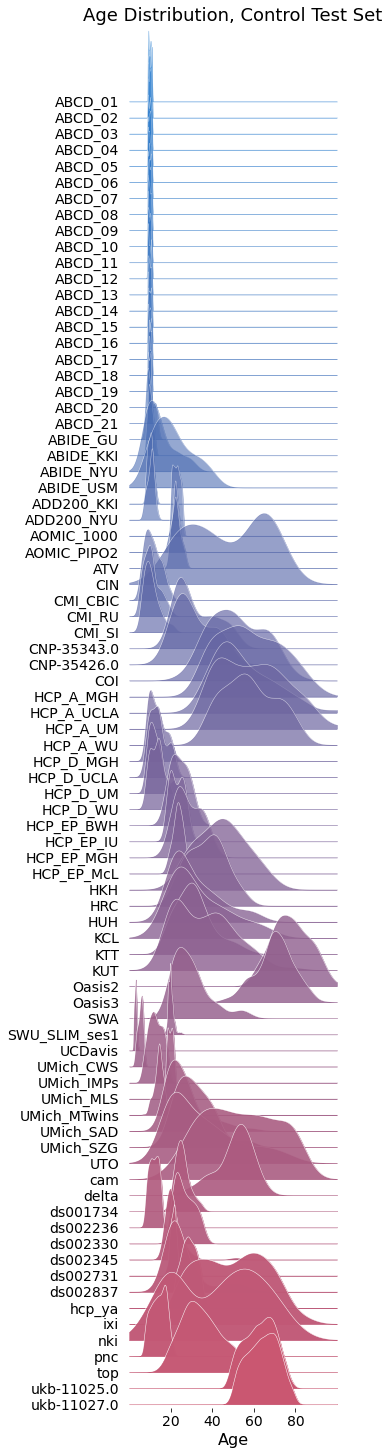

In [15]:
# Code for Figure 1A (controls test age)
plt.figure(dpi=380)
fig, axes = joypy.joyplot(age_controls_te, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,20), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[0,100])
plt.title('Age Distribution, Control Test Set', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

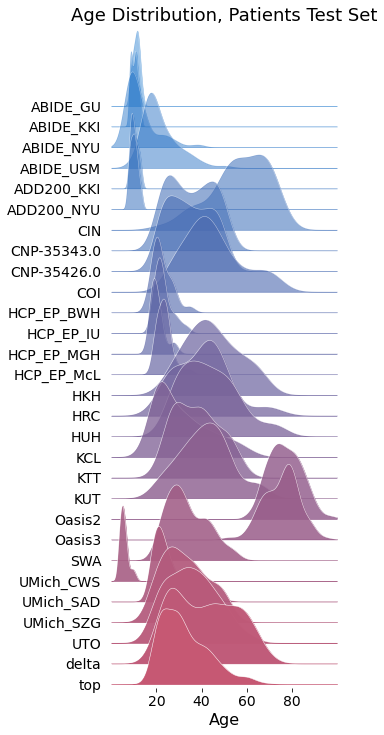

In [19]:
# Code for Figure 1A (patients test age)
plt.figure(dpi=380)
fig, axes = joypy.joyplot(age_patients, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,10), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[0,100])
plt.title('Age Distribution, Patients Test Set', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

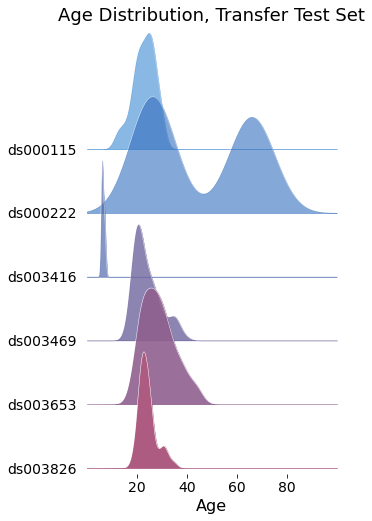

In [20]:
# Code for Figure 1A (transfer test age)
plt.figure(dpi=380)
fig, axes = joypy.joyplot(age_transfer, column=['age'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,7), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[0,100])
plt.title('Age Distribution, Transfer Test Set', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Age', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

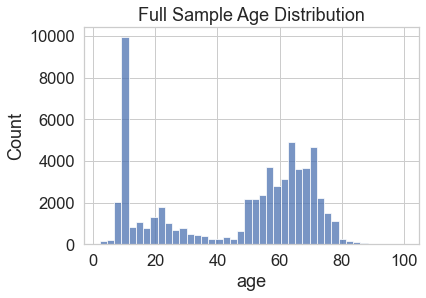

In [31]:
# Code for Figure 1B
sns.set(style="whitegrid", font_scale=1.5)
sns.histplot(data=age, x="age").set_title('Full Sample Age Distribution');

figure: Figure 2.
:::
![](elife-72904.xml.media/fig2.jpg)

## Normative modeling in clinical cohorts.

Reference brain charts were transferred to several clinical samples (described in (**A**)). Patterns of extreme deviations were summarized for each clinical group and compared to matched control groups (from the same sites). (**B**) Shows extreme positive deviations (thicker/larger than expected) and (**C**) shows the extreme negative deviation (thinner/smaller than expected) patterns. (**D**) Shows the significant (FDR corrected p&lt;0.05) results of classical case-control methods (mass-univariate t-tests) on the true cortical thickness data (top row) and on the deviations scores (bottom row). There is unique information added by each approach which becomes evident when noticing the maps in (**B–D**) are not identical. ADHD, attention-deficit hyperactive disorder; ASD, autism spectrum disorder; BD, bipolar disorder; EP, early psychosis; FDR, false discovery rate; MDD, major depressive disorder; SZ, schizophrenia.
:::
{#fig2}

In [32]:
# Load in numpy arrays for extreme positive deviations. 
# There is one numpy array for each clinical group shown in Figure 2C
# There is one numpy array for each hemisphere
parcellation_adhd_pos_r = np.load('docs/parcellation_adhd_pos_r.npy')
parcellation_adhd_pos_l = np.load('docs/parcellation_adhd_pos_l.npy')
parcellation_adhd_hc_pos_r = np.load('docs/parcellation_adhd_hc_pos_r.npy')
parcellation_adhd_hc_pos_l = np.load('docs/parcellation_adhd_hc_pos_l.npy')
parcellation_asd_pos_r = np.load('docs/parcellation_asd_pos_r.npy')
parcellation_asd_pos_l = np.load('docs/parcellation_asd_pos_l.npy')
parcellation_asd_hc_pos_r = np.load('docs/parcellation_asd_hc_pos_r.npy')
parcellation_asd_hc_pos_l = np.load('docs/parcellation_asd_hc_pos_l.npy')
parcellation_bd_pos_r = np.load('docs/parcellation_bd_pos_r.npy')
parcellation_bd_pos_l = np.load('docs/parcellation_bd_pos_l.npy')
parcellation_bd_hc_pos_r = np.load('docs/parcellation_bd_hc_pos_r.npy')
parcellation_bd_hc_pos_l = np.load('docs/parcellation_bd_hc_pos_l.npy')
parcellation_ep_pos_r = np.load('docs/parcellation_ep_pos_r.npy')
parcellation_ep_pos_l = np.load('docs/parcellation_ep_pos_l.npy')
parcellation_ep_hc_pos_r = np.load('docs/parcellation_ep_hc_pos_r.npy')
parcellation_ep_hc_pos_l = np.load('docs/parcellation_ep_hc_pos_l.npy')
parcellation_mdd_pos_r = np.load('docs/parcellation_mdd_pos_r.npy')
parcellation_mdd_pos_l = np.load('docs/parcellation_mdd_pos_l.npy')
parcellation_mdd_hc_pos_r = np.load('docs/parcellation_mdd_hc_pos_r.npy')
parcellation_mdd_hc_pos_l = np.load('docs/parcellation_mdd_hc_pos_l.npy')
parcellation_sz_pos_r = np.load('docs/parcellation_sz_pos_r.npy')
parcellation_sz_pos_l = np.load('docs/parcellation_sz_pos_l.npy')
parcellation_sz_hc_pos_r = np.load('docs/parcellation_sz_hc_pos_r.npy')
parcellation_sz_hc_pos_l = np.load('docs/parcellation_sz_hc_pos_l.npy')

In [34]:
# import nilearn plotting tools
from nilearn import plotting

In [ ]:
# ADHD Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_adhd_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as ADHD) Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_adhd_hc_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# ADHD Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_adhd_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as ADHD) Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_adhd_hc_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# ASD Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_asd_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as ASD) Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_asd_hc_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# ASD Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_asd_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as ASD) Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_asd_hc_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# EP Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_ep_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as EP) Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_ep_hc_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as EP) Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_ep_hc_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# EP Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_ep_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# SZ Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_sz_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from SZ sites) Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_sz_hc_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# SZ Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_sz_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from SZ sites) Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_sz_hc_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# BD Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_bd_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as BD) Positive  Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_bd_hc_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# BD Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_bd_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as BD) Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_bd_hc_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# MDD Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_mdd_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as MDD) Positive Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_mdd_hc_pos_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# MDD Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_mdd_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as MDD) Positive Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_mdd_hc_pos_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [74]:
# Load in numpy arrays for extreme negative deviations. 
# There is one numpy array for each clinical group shown in Figure 2D
# There is one numpy array for each hemisphere
parcellation_adhd_neg_r = np.load('docs/parcellation_adhd_neg_r.npy')
parcellation_adhd_neg_l = np.load('docs/parcellation_adhd_neg_l.npy')
parcellation_adhd_hc_neg_r = np.load('docs/parcellation_adhd_hc_neg_r.npy')
parcellation_adhd_hc_neg_l = np.load('docs/parcellation_adhd_hc_neg_l.npy')
parcellation_asd_neg_r = np.load('docs/parcellation_asd_neg_r.npy')
parcellation_asd_neg_l = np.load('docs/parcellation_asd_neg_l.npy')
parcellation_asd_hc_neg_r = np.load('docs/parcellation_asd_hc_neg_r.npy')
parcellation_asd_hc_neg_l = np.load('docs/parcellation_asd_hc_neg_l.npy')
parcellation_bd_neg_r = np.load('docs/parcellation_bd_neg_r.npy')
parcellation_bd_neg_l = np.load('docs/parcellation_bd_neg_l.npy')
parcellation_bd_hc_neg_r = np.load('docs/parcellation_bd_hc_neg_r.npy')
parcellation_bd_hc_neg_l = np.load('docs/parcellation_bd_hc_neg_l.npy')
parcellation_ep_neg_r = np.load('docs/parcellation_ep_neg_r.npy')
parcellation_ep_neg_l = np.load('docs/parcellation_ep_neg_l.npy')
parcellation_ep_hc_neg_r = np.load('docs/parcellation_ep_hc_neg_r.npy')
parcellation_ep_hc_neg_l = np.load('docs/parcellation_ep_hc_neg_l.npy')
parcellation_mdd_neg_r = np.load('docs/parcellation_mdd_neg_r.npy')
parcellation_mdd_neg_l = np.load('docs/parcellation_mdd_neg_l.npy')
parcellation_mdd_hc_neg_r = np.load('docs/parcellation_mdd_hc_neg_r.npy')
parcellation_mdd_hc_neg_l = np.load('docs/parcellation_mdd_hc_neg_l.npy')
parcellation_sz_neg_r = np.load('docs/parcellation_sz_neg_r.npy')
parcellation_sz_neg_l = np.load('docs/parcellation_sz_neg_l.npy')
parcellation_sz_hc_neg_r = np.load('docs/parcellation_sz_hc_neg_r.npy')
parcellation_sz_hc_neg_l = np.load('docs/parcellation_sz_hc_neg_l.npy')

In [ ]:
# ADHD Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_adhd_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as ADHD) Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_adhd_hc_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# ADHD Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_adhd_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as ADHD) Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_adhd_hc_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# ASD Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_asd_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as ASD) Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_asd_hc_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# ASD Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_asd_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as ASD) Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_asd_hc_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# EP Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_ep_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as EP) Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_ep_hc_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# EP Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_ep_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as EP) Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_ep_hc_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# SZ Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_sz_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from SZ sites) Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_sz_hc_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# SZ Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_sz_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from SZ sites) Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_sz_hc_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# BD Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_bd_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as BD) Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_bd_hc_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# BD Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_bd_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as BD) Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_bd_hc_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# MDD Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_mdd_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# HC (from same sites as MDD) Negative Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_mdd_hc_neg_r, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# MDD Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_mdd_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# HC (from same sites as MDD) Negative Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_mdd_hc_neg_l, threshold=None, symmetric_cmap=False, vmax=15, cmap='plasma', bg_map=fsaverage.sulc_left)
view

# Results

We split the available data into training and test sets, stratifying by site ([Table 1](#table1), [Supplementary files 1 and 2](#supp1)). After careful quality checking procedures, we fit normative models using a set of covariates (age, sex, and fixed effects for site) to predict cortical thickness and subcortical volume for each parcel in a high-resolution atlas ([@bib7]). We employed a warped Bayesian linear regression model to accurately model non-linear and non-Gaussian effects ([@bib14]), whilst accounting for scanner effects ([@bib2]; [@bib23]). These models are summarized in [Figure 1](#fig1) and [Figure 3](#fig3), [Figure 3—figure supplements 1](#fig3s1)–[3](#fig3s3), and with an online interactive visualization tool for exploring the evaluation metrics across different test sets (overview of this tool shown in [Video 1](#video1)). The raw data used in these visualizations are available on [GitHub](https://github.com/predictive-clinical-neuroscience/braincharts/tree/master/metrics) ([@bib36]).

figure: Figure 3.
:::
![](elife-72904.xml.media/fig3.jpg)

## Evaluation metrics across all test sets.

The distribution of evaluation metrics in four different test sets (full, mQC, patients, and transfer, see Materials and methods) separated into left and right hemispheres and subcortical regions, with the skew and excess kurtosis being measures that depict the accuracy of the estimated shape of the model, ideally both would be around zero. Note that kurtosis is highly sensitive to outlying samples. Overall, these models show that the models fit well in term of central tendency and variance (explained variance and MSLL) and model the shape of the distribution well in most regions (skew and kurtosis). Code and sample data for transferring these models to new sites not included in training is shared.
:::
{#fig3}

In [96]:
# Load in the file containing all test set evaluation metrics
df_eval = pd.read_csv('docs/all_test_sets_eval.csv')

In [97]:
# Exclude a few extreme outliers for plotting purposes
df_eval = df_eval.query('Kurtosis < 15')
df_eval = df_eval.query('MSLL > -20')

In [98]:
# Separate each test set into its own dataframe
df_transfer = df_eval.query('test_label == "transfer"')
df_12k_mqc2_test = df_eval.query('test_label == "mQC"')
df_29k_test = df_eval.query('test_label == "full test"')
df_pt = df_eval.query('test_label == "patients"')

Text(0.5, 0, '')

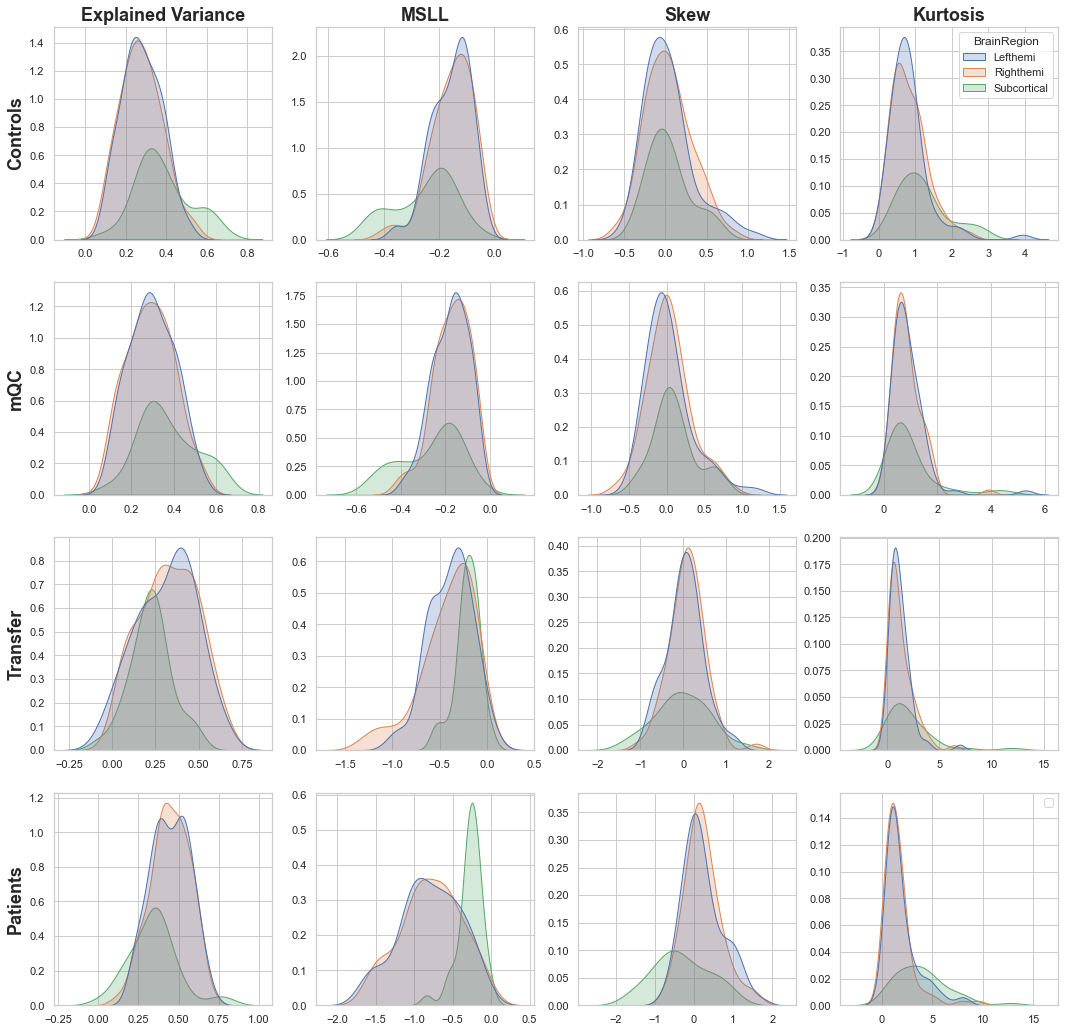

In [151]:
# Code for Figure 3 plot
fig, axs = plt.subplots(4, 4,figsize=(18,18))
sns.set(style="whitegrid", font_scale=1.0)
sns.kdeplot(x=df_29k_test['EV'], hue=df_29k_test['BrainRegion'], fill=True, ax=axs[0,0],legend=False);
axs[0,0].set_title('Explained Variance', fontsize=18, fontweight='bold')
axs[0,0].set_ylabel('Controls', fontsize=18, fontweight='bold')
axs[0,0].set_xlabel('')
sns.kdeplot(x=df_29k_test['MSLL'], hue=df_29k_test['BrainRegion'], fill=True, ax=axs[0,1],legend=False);
axs[0,1].set_title('MSLL', fontsize=18, fontweight='bold')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')
sns.kdeplot(x=df_29k_test['Skew'], hue=df_29k_test['BrainRegion'], fill=True, ax=axs[0,2],legend=False);
axs[0,2].set_title('Skew', fontsize=18, fontweight='bold')
axs[0,2].set_ylabel('')
axs[0,2].set_xlabel('')
sns.kdeplot(x=df_29k_test['Kurtosis'], hue=df_29k_test['BrainRegion'], fill=True, ax=axs[0,3]);
plt.legend("upper left", bbox_to_anchor=(1, 1))
axs[0,3].set_title('Kurtosis', fontsize=18, fontweight='bold')
axs[0,3].set_ylabel('')
axs[0,3].set_xlabel('')
sns.kdeplot(x=df_12k_mqc2_test['EV'], hue=df_12k_mqc2_test['BrainRegion'], fill=True, ax=axs[1,0],legend=False);
axs[1,0].set_ylabel('mQC', fontsize=18, fontweight='bold')
axs[1,0].set_xlabel('')
sns.kdeplot(x=df_12k_mqc2_test['MSLL'], hue=df_12k_mqc2_test['BrainRegion'], fill=True, ax=axs[1,1],legend=False);
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('')
sns.kdeplot(x=df_12k_mqc2_test['Skew'], hue=df_12k_mqc2_test['BrainRegion'], fill=True, ax=axs[1,2],legend=False);
axs[1,2].set_ylabel('')
axs[1,2].set_xlabel('')
sns.kdeplot(x=df_12k_mqc2_test['Kurtosis'], hue=df_12k_mqc2_test['BrainRegion'], fill=True, ax=axs[1,3],legend=False);
axs[1,3].set_ylabel('')
axs[1,3].set_xlabel('')
sns.kdeplot(x=df_transfer['EV'], hue=df_transfer['BrainRegion'], fill=True, ax=axs[2,0],legend=False);
axs[2,0].set_ylabel('Transfer', fontsize=18, fontweight='bold')
axs[2,0].set_xlabel('')
sns.kdeplot(x=df_transfer['MSLL'], hue=df_transfer['BrainRegion'], fill=True, ax=axs[2,1],legend=False);
axs[2,1].set_ylabel('')
axs[2,1].set_xlabel('')
sns.kdeplot(x=df_transfer['Skew'], hue=df_transfer['BrainRegion'], fill=True, ax=axs[2,2],legend=False);
axs[2,2].set_ylabel('')
axs[2,2].set_xlabel('')
sns.kdeplot(x=df_transfer['Kurtosis'], hue=df_transfer['BrainRegion'], fill=True, ax=axs[2,3],legend=False);
axs[2,3].set_ylabel('')
axs[2,3].set_xlabel('')
sns.kdeplot(x=df_pt['EV'], hue=df_pt['BrainRegion'], fill=True, ax=axs[3,0],legend=False);
axs[3,0].set_ylabel('Patients', fontsize=18, fontweight='bold')
axs[3,0].set_xlabel('')
sns.kdeplot(x=df_pt['MSLL'], hue=df_pt['BrainRegion'], fill=True, ax=axs[3,1],legend=False);
axs[3,1].set_ylabel('')
axs[3,1].set_xlabel('')
sns.kdeplot(x=df_pt['Skew'], hue=df_pt['BrainRegion'], fill=True, ax=axs[3,2],legend=False);
axs[3,2].set_ylabel('')
axs[3,2].set_xlabel('')
sns.kdeplot(x=df_pt['Kurtosis'], hue=df_pt['BrainRegion'], fill=True, ax=axs[3,3],legend=False);
axs[3,3].set_ylabel('')
axs[3,3].set_xlabel('')

figure: Figure 3—figure supplement 1.
:::
![](elife-72904.xml.media/fig3-figsupp1.jpg)

## Comparison of the explained variance in cortical thickness across the different test sets.

The patterns appear to be robust and consistent across the different test sets.
:::
{#fig3s1}

In [111]:
# Load the explained variance numpy arrays for Figure 3 Supplement 1
# There is one npy array for each test set and each hemisphere
parcellation_29ktest_l = np.load('docs/parcellation_controls_ev_l.npy')
parcellation_29ktest_r = np.load('docs/parcellation_controls_ev_r.npy')
parcellation_12k_mqc2_test_l = np.load('docs/parcellation_mqc_ev_l.npy')
parcellation_12k_mqc2_test_r = np.load('docs/parcellation_mqc_ev_r.npy')
parcellation_pt_l = np.load('docs/parcellation_pt_ev_l.npy')
parcellation_pt_r = np.load('docs/parcellation_pt_ev_r.npy')
parcellation_transfer_l = np.load('docs/parcellation_transfer_ev_l.npy')
parcellation_transfer_r = np.load('docs/parcellation_transfer_ev_r.npy')

In [ ]:
# Controls Test Set Explained Variance, Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_29ktest_r, threshold=None, symmetric_cmap=False, vmax=0.7, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# Controls Test Set Explained Variance, Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_29ktest_l, threshold=None, symmetric_cmap=False, vmax=0.7, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# mQC Test Set Explained Variance, Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_12k_mqc2_test_r, threshold=None, symmetric_cmap=False, vmax=0.7, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# mQC Test Set Explained Variance, Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_12k_mqc2_test_l, threshold=None, symmetric_cmap=False, vmax=0.7, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# Patients Test Set Explained Variance, Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_pt_r, threshold=None, symmetric_cmap=False, vmax=0.7, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# Patients Test Set Explained Variance, Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_pt_l, threshold=None, symmetric_cmap=False, vmax=0.7, cmap='plasma', bg_map=fsaverage.sulc_left)
view

In [ ]:
# Transfer Test Set Explained Variance, Right Hemisphere
view = plotting.view_surf(fsaverage.infl_right, parcellation_transfer_r, threshold=None, vmax=0.7, symmetric_cmap=False, cmap='plasma', bg_map=fsaverage.sulc_right)
view

In [ ]:
# Transfer Test Set Explained Variance, Left Hemisphere
view = plotting.view_surf(fsaverage.infl_left, parcellation_transfer_l, threshold=None, vmax=0.7, symmetric_cmap=False, cmap='plasma', bg_map=fsaverage.sulc_left)
view

figure: Figure 3—figure supplement 2.
:::
![](elife-72904.xml.media/fig3-figsupp2.jpg)

## Showing the explained variance for each brain region across 10 randomized resampling of the full control test set.
:::
{#fig3s2}

In [125]:
# Load the file containing controls test set 10-fold resampling evaluation of explained variance
cv = pd.read_csv('docs/cross_validation_10fold_evaluation.csv')

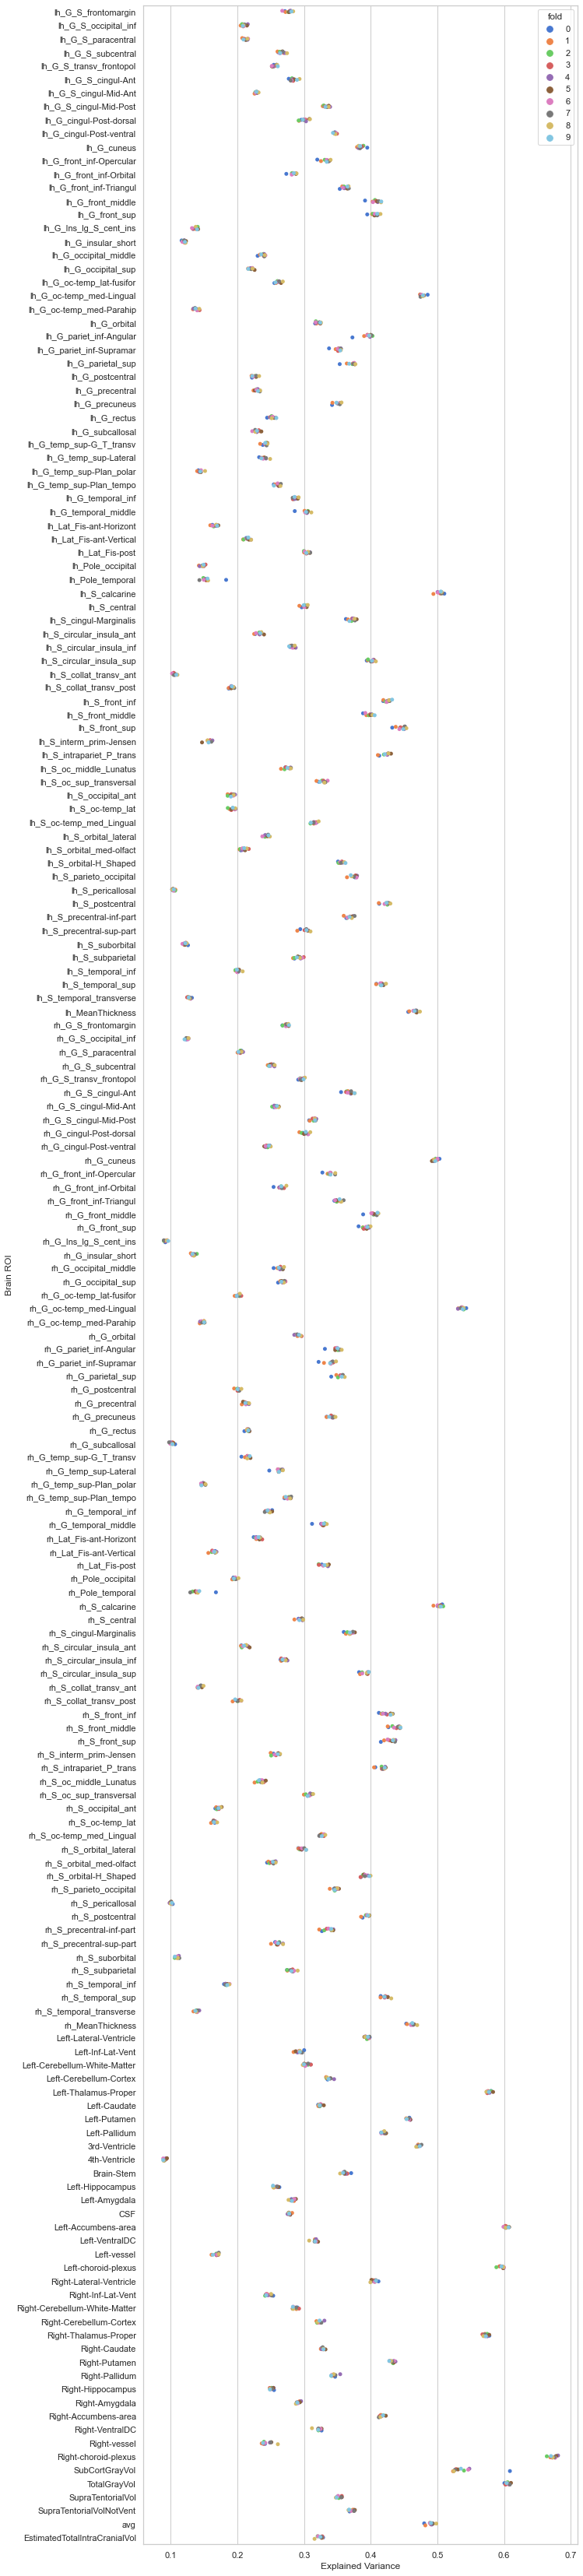

In [126]:
# Code for plotting Figure 3 Supplement 2
sns.set_theme(style="whitegrid", palette="muted")
f, ax = plt.subplots(figsize=(10, 60))
sns.stripplot(data=cv, x="EV", y="Label", hue="fold", ax=ax);
ax.set(ylabel="Brain ROI", xlabel="Explained Variance");

figure: Figure 3—figure supplement 3.
:::
![](elife-72904.xml.media/fig3-figsupp3.jpg)

## Per site explained variance across the different test sets.
:::
{#fig3s3}

In [129]:
# Load the files containing evaluation metrics for each site across all test sets
full_per_site_ev = pd.read_csv('docs/blr_controls_full_site_metrics.csv')
qc_per_site_ev = pd.read_csv('docs/blr_site_metrics_qc.csv')
pt_per_site_ev = pd.read_csv('docs/blr_site_metrics_pt.csv')
transfer_per_site_ev = pd.read_csv('docs/blr_site_metrics_OPNtransfer.csv')

In [130]:
# Exclude outliers for plotting purposes
full_per_site_ev = full_per_site_ev.query('EV > -1')

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

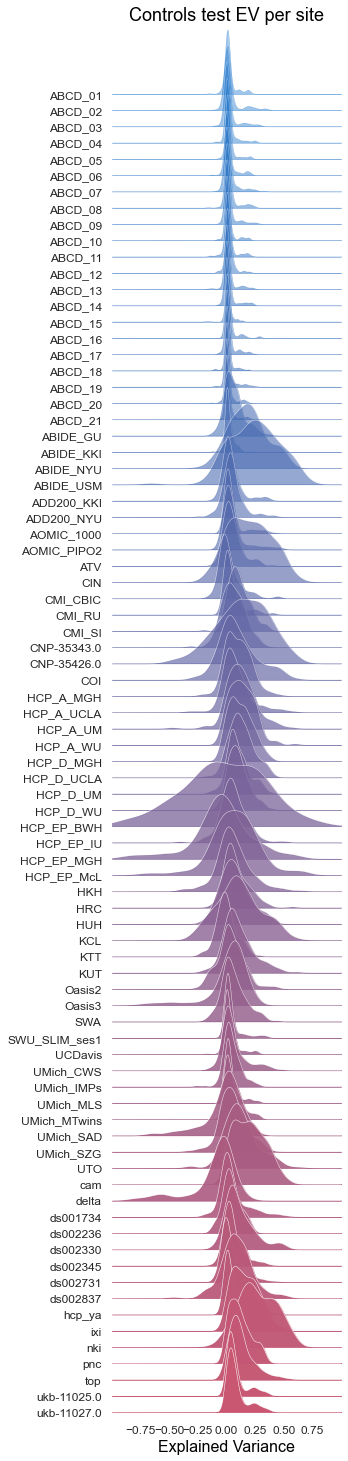

In [131]:
# Code for plotting Figure 3 Supplement 3 panel A
plt.figure(dpi=380)
fig, axes = joypy.joyplot(full_per_site_ev, column=['EV'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,20), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[-1,1])
plt.title('Controls test EV per site', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Explained Variance', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

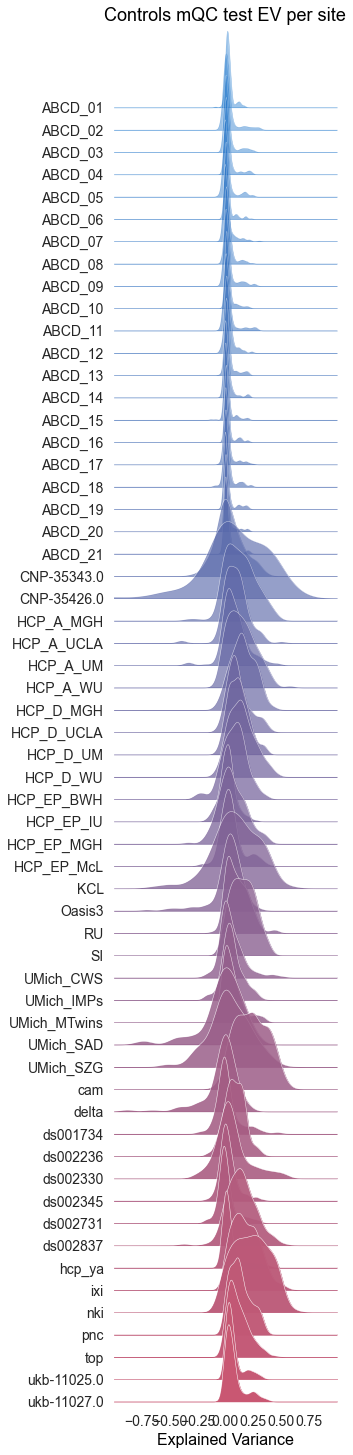

In [132]:
# Code for plotting Figure 3 Supplement 3 panel B
plt.figure(dpi=380)
fig, axes = joypy.joyplot(qc_per_site_ev, column=['EV'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,20), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[-1,1])
plt.title('Controls mQC test EV per site', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Explained Variance', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

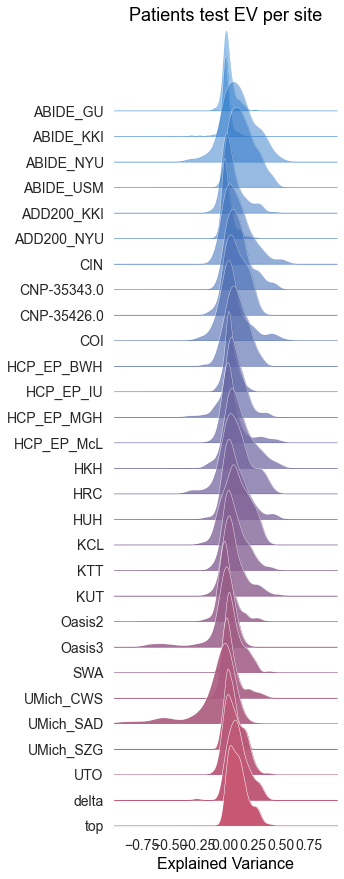

In [134]:
# Code for plotting Figure 3 Supplement 3 panel C
plt.figure(dpi=380)
fig, axes = joypy.joyplot(pt_per_site_ev, column=['EV'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,12), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[-1,1])
plt.title('Patients test EV per site', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Explained Variance', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

Text(0, 0.5, 'Site')

<Figure size 2280x1520 with 0 Axes>

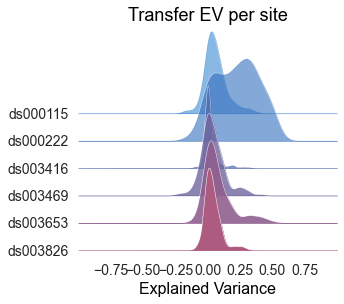

In [135]:
# Code for plotting Figure 3 Supplement 3 panel D
plt.figure(dpi=380)
fig, axes = joypy.joyplot(transfer_per_site_ev, column=['EV'], overlap=1.0, by="site", ylim='own', fill=True, figsize=(5,4), legend=False, xlabels=True, ylabels=True, 
                          colormap=lambda x: color_gradient(x, start=(.08, .45, .8),stop=(.8, .34, .44)), alpha=0.6, linewidth=.5, linecolor='w', fade=True, x_range=[-1,1])
plt.title('Transfer EV per site', fontsize=18, color='black', alpha=1)
plt.rc("font", size=14)
plt.xlabel('Explained Variance', fontsize=16, color='black', alpha=1)
plt.ylabel('Site', fontsize=14, color='black', alpha=1)

elife-72904-video1.mp4 video/mp4

We validate our models with several careful procedures: first, we report out of sample metrics; second, we perform a supplementary analysis on a subset of participants for whom input data had undergone manual quality checking by an expert rater ([Table 1](#table1) – mQC). Third, each model fit was evaluated using metrics ([Figure 3](#fig3), [Figure 3—figure supplements 1](#fig3s1)–[3](#fig3s3)) that quantify central tendency and distributional accuracy ([@bib9]; [@bib14]). We also estimated separate models for males and females, which indicate that sex effects are adequately modeled using a global offset. Finally, to facilitate independent validation, we packaged pretrained models and code for transferring to new samples into an [open resource](https://github.com/predictive-clinical-neuroscience/braincharts) for use by the community and demonstrated [how to transfer](https://colab.research.google.com/github/predictive-clinical-neuroscience/braincharts/blob/master/scripts/apply_normative_models.ipynb) the models to new samples (i.e., data not present in the initial training set).

Our models provide the opportunity for mapping the diverse trajectories of different brain areas. Several examples are shown in [Figure 1C and D](#fig1) which align with known patterns of development and aging ([@bib10]; [@bib16]; [@bib40]). Moreover, across the cortex and subcortex our model fits well, explaining up to 80% of the variance out of sample ([Figure 3](#fig3), [Figure 3—figure supplements 1](#fig3s1)–[3](#fig3s3)).

A goal of this work is to develop normative models that can be applied to many different clinical conditions. To showcase this, we apply the model to a transdiagnostic psychiatric cohort ([Table 1](#table1) – Clinical; [Figure 2](#fig2)) resulting in personalized, whole-brain deviation maps that can be used to understand inter-individual variability (e.g., for stratification) and to quantify group separation (e.g., case-control effects). To demonstrate this, for each clinical group, we summarized the individual deviations within that group by computing the proportion of subjects that have deviations in each region and comparing to matched (same sites) controls in the test set ([Figure 2B–C](#fig2)). Additionally, we performed case-control comparisons on the raw cortical thickness and subcortical volumes, and on the deviation maps ([Figure 2D](#fig2)), again against a matched sample from the test set. This demonstrates the advantages of using normative models for investigating individual differences in psychiatry, that is, quantifying clinically relevant information at the level of each individual. For most diagnostic groups, the z-statistics derived from the normative deviations also provided stronger case-control effects than the raw data. This shows the importance of accurate modeling of population variance across multiple clinically relevant dimensions. The individual-level deviations provide complimentary information to the group effects, which aligns with previous work ([@bib44]; [@bib45]; [@bib48]). We note that a detailed description of the clinical significance of our findings is beyond the scope of this work and will be presented separately.

# Discussion

In this work, we create lifespan brain charts of cortical thickness and subcortical volume derived from structural MRI, to serve as reference models. Multiple data sets were joined to build a mega-site lifespan reference cohort to provide good coverage of the lifespan. We applied the reference cohort models to clinical data sets and demonstrated the benefits of normative modeling in addition to standard case-control comparisons. All models, including [documentation](https://pcntoolkit.readthedocs.io/en/latest/pages/tutorial_braincharts_apply_nm.html) and [code](https://github.com/predictive-clinical-neuroscience/braincharts), are made available to the research community. We also provide an example data set (that includes data from sites not in the training sample) along with the code to demonstrate how well our models can adapt to new sites, and how easy it is to transfer our pretrained models to users’ own data sets.

We identify three main strengths of our approach. First, our large lifespan data set provides high anatomical specificity, necessary for discriminating between conditions, predicting outcomes, and stratifying subtypes. Second, our models are flexible in that they can model non-Gaussian distributions, can easily be transferred to new sites, and are built on validated analytical techniques and software tools ([@bib14]; [@bib23]; [@bib28]). Third, we show the general utility of this work in that it provides the ability to map individual variation whilst also improving case-control inferences across multiple disorders.

In recent work, a large consortium established lifespan brain charts that are complementary to our approach ([@bib4]). Benefits of their work include precisely quantifying brain growth using a large cohort, but they only provide estimates of four coarse global measures (e.g., total brain volume). While this can precisely quantify brain growth and aging this does not provide the ability to generate individualized fingerprints or to stratify clinical cohorts. In contrast, in this work, we focus on providing spatially specific estimates (188 different brain regions) across the post-natal lifespan which provides fine-grained anatomical estimates of deviation, offering an individualized perspective that can be used for clinical stratification. We demonstrate the transdiagnostic clinical value of our models ([Figure 2](#fig2)) by showing how clinical variation is widespread in a fine-grain manner (e.g., not all individuals deviate in the same regions and not all disorders have the same characteristic patterns) and we facilitate clinical applications of our models by sharing tutorial code notebooks with sample data that can be run locally or online in a web browser.

We also identify the limitations of this work. We view the word ‘normative’ as problematic. This language implies that there are normal and abnormal brains, a potentially problematic assumption. As indicated in [Figure 2](#fig2), there is considerable individual variability and heterogeneity among trajectories. We encourage the use of the phrase ‘reference cohort’ over ‘normative model’. In order to provide coverage of the lifespan the curated data set is based on aggregating existing data, meaning there is unavoidable sampling bias. Race, education, and socioeconomic variables were not fully available for all included data sets, however, given that data were compiled from research studies, they are likely samples drawn predominantly from Western, Educated, Industrialized, Rich, and Democratic (WEIRD) societies ([@bib18]) and future work should account for these factors. The sampling bias of UKBiobank ([@bib15]) is especially important for users to consider as UKBiobank data contributes 59% of the full sample. By sampling both healthy population samples and case-control studies, we achieve a reasonable estimate of variation across individuals, however, downstream analyses should consider the nature of the reference cohort and whether it is appropriate for the target sample. Second, we have relied on semi-automated quality control (QC) for the full sample which—despite a conservative choice of inclusion threshold—does not guarantee either that low-quality data were excluded or that the data were excluded are definitively excluded because of artifacts. We addressed this by comparing our full test set to a manually quality check data set and observed similar model performance. Also, Freesurfer was not adjusted for the very young age ranges (2–7 yo) thus caution should be used when interpreting the model on new data in this age range. Finally, although the models presented in this study are comprehensive, they are only the first step, and we will augment our [repository](https://github.com/predictive-clinical-neuroscience/braincharts/models) with more diverse data, different features, and modeling advances as these become available.

# Materials and methods

Data from 82 sites were combined to create the initial full sample. These sites are described in detail in [Supplementary files 1-2](#supp1), including the sample size, age (mean and standard deviation), and sex distribution of each site. Many sites were pulled from publicly available data sets including [ABCD](https://abcdstudy.org/), [ABIDE](http://fcon_1000.projects.nitrc.org/indi/abide/), [ADHD200](https://fcon_1000.projects.nitrc.org/indi/adhd200/), [CAMCAN](https://www.cam-can.org/index.php?content=dataset), [CMI-HBN](http://fcon_1000.projects.nitrc.org/indi/cmi_healthy_brain_network/), [HCP-Aging](https://www.humanconnectome.org/study/hcp-lifespan-aging), [HCP-Development](https://www.humanconnectome.org/study/hcp-lifespan-development), [HCP-Early Psychosis](https://www.humanconnectome.org/study/human-connectome-project-for-early-psychosis), [HCP-Young Adult](https://www.humanconnectome.org/study/hcp-young-adult), [IXI](https://brain-development.org/ixi-dataset/), [NKI-RS](http://fcon_1000.projects.nitrc.org/indi/enhanced/), [Oasis](https://www.oasis-brains.org/), [OpenNeuro](https://openneuro.org/), [PNC](https://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html), [SRPBS](https://bicr-resource.atr.jp/srpbsopen/), and [UKBiobank](https://www.ukbiobank.ac.uk/). For data sets that include repeated visits (i.e., ABCD and UKBiobank), only the first visit was included. Other included data come from studies conducted at the University of Michigan ([@bib11]; [@bib35]; [@bib41]; [@bib42]; [@bib43]; [@bib49]), University of California Davis ([@bib32]), University of Oslo ([@bib31]), King’s College London ([@bib17]; [@bib25]), and Amsterdam University Medical Center ([@bib29]). Full details regarding sample characteristics, diagnostic procedures, and acquisition protocols can be found in the publications associated with each of the studies. Equal sized training and testing data sets (split half) were created using scikit-learn’s train_test_split function, stratifying on the site variable. It is important to stratify based on site, not only study ([@bib4]), as many of the public studies (i.e., ABCD) include several sites, thus modeling study does not adequately address MRI scanner confounds. To test stability of the model performance, the full test set was randomly resampled 10 times and evaluation metrics were re-calculated on each split of the full test set ([Figure 3—figure supplement 2](#fig3s2)). To show generalizability of the models to new data not included in training, we leveraged data from [OpenNeuro.org](https://openneuro.org/) ([@bib26]) to create a transfer data set (six sites, N=546, [Supplementary file 3](#supp3)). This data are provided along with the code for transferring to walk users through how to apply these models to their own data.

The clinical validation sample consisted of a subset of the full data set (described in detail in [Figure 1A](#fig1), [Figure 2A](#fig2) and [Supplementary file 1](#supp1)). Studies (sites) contributing clinical data included: Autism Brain Imaging Database Exchange (ABIDE GU, KKI, NYU, USM), ADHD200 (KKI, NYU), CNP, SRPBS (CIN, COI, KTT, KUT, HKH, HRC, HUH, SWA, UTO), Delta (AmsterdamUMC), Human Connectome Project Early Psychosis (HCP-EP BWH, IU, McL, MGH), KCL, University of Michigan Children Who Stutter (UMich_CWS), University of Michigan Social Anxiety Disorder (UMich_SAD), University of Michigan Schizophrenia Gaze Processing (UMich_SZG), and TOP (University of Oslo).

In addition to the sample-specific inclusion criteria, inclusion criteria for the full sample were based on participants having basic demographic information (age and sex), a T1-weighted MRI volume, and Freesurfer output directories that include summary files that represent left and right hemisphere cortical thickness values of the Destrieux parcellation and subcortical volumetric values (aseg.stats, lh.aparc.a2009s.stats, and rh.aparc.a2009s.stats). Freesurfer image analysis suite (version 6.0) was used for cortical reconstruction and volumetric segmentation for all studies. The technical details of these procedures are described in prior publications ([@bib6]; [@bib13]; [@bib12]). UK Biobank was the only study for which Freesurfer was not run by the authors. Freesurfer functions _aparcstats2table_ and _asegstats2table_ were run to extract cortical thickness from the Destrieux parcellation ([@bib7]) and subcortical volume for all participants into CSV files. These files were inner merged with the demographic files, using Pandas, and NaN rows were dropped.

QC is an important consideration for large samples and is an active research area ([@bib1]; [@bib24]; [@bib34]). We consider manual quality checking of images both prior to and after preprocessing to be the gold standard. However, this is labor intensive and prohibitive for very large samples. Therefore, in this work, we adopt a pragmatic and multi-pronged approach to QC. First, a subset of the full data set underwent manual quality checking (mQC) by author S.R. [Papaya](https://rii-mango.github.io/Papaya/), a JavaScript-based image viewer. Manual quality checking was performed during December 2020 when the Netherlands was in full lockdown due to COVID-19 and S.R. was living alone in a new country with a lot of free time. Data included in this manual QC step was based on what was available at the time ([Supplementary file 2](#supp2)). Later data sets that were included were not manually QC’d due to resource and time constraints. Scripts were used to initialize a manual QC session and track progress and organize ratings. All images (T1w volume and Freesurfer brain.finalsurfs) were put into JSON files that the mQC script would call when loading Papaya. Images were rated using a ‘pass/fail/flag’ scale and the rating was tracked in an automated manner using keyboard inputs (up arrow=pass, down arrow=fail, F key=flag, and left/right arrows were used to move through subjects). Each subject’s T1w volume was viewed in 3D volumetric space, with the Freesurfer brain.finalsurfs file as an overlay, to check for obvious quality issues such as excessive motion, ghosting or ringing artifacts. Example scripts used for quality checking and further instructions for using the manual QC environment can be found on [GitHub](https://github.com/saigerutherford/lifespan_qc_scripts)([@bib38] copy archived at [swh:1:rev:70894691c74febe2a4d40ab0c84c50094b9e99ce](https://archive.softwareheritage.org/swh:1:dir:9c98ca93b3fb3b463607286eec7dfc9c4c3e97db;origin=https://github.com/saigerutherford/lifespan_qc_scripts;visit=swh:1:snp:84918033541e80549e91c96e85a29d191321d0a3;anchor=swh:1:rev:70894691c74febe2a4d40ab0c84c50094b9e99ce)). We relied on ABCD consortium QC procedures for the QC for this sample. The ABCD study data distributes a variable (freesqc01.txt; fsqc_qc = = 1/0) that represents manual quality checking (pass/fail) of the T1w volume and Freesurfer data, thus this data set was added into our manual quality checked data set bringing the sample size to 24,354 individuals passing manual quality checks. Note that QC was performed on the data prior to splitting of the data to assess generalizability. Although this has a reduced sample, we consider this to be a gold-standard sample in that every single scan has been checked manually. All inferences reported in this manuscript were validated against this sample. Second, for the full sample, we adopted an automated QC procedure that quantifies image quality based on the Freesurfer Euler Characteristic (EC), which has been shown to be an excellent proxy for manual labeling of scan quality ([@bib30]; [@bib34]) and is the most important feature in automated scan quality classifiers ([@bib24]). Since the distribution of the EC varies across sites, we adopt a simple approach that involves scaling and centering the distribution over the EC across sites and removing samples in the tail of the distribution (see [@bib23] for details). While any automated QC heuristic is by definition imperfect, we note that this is based on a conservative inclusion threshold such that only samples well into the tail of the EC distribution are excluded, which are likely to be caused by true topological defects rather than abnormalities due to any underlying pathology. We separated the evaluation metrics into full test set (relying on automated QC) and mQC test set in order to compare model performance between the two QC approaches and were pleased to notice that the evaluation metrics were nearly identical across the two methods.

Normative modeling was run using python 3.8 and the [PCNtoolkit package](https://pcntoolkit.readthedocs.io/) (version 0.20). Bayesian Linear Regression (BLR) with likelihood warping was used to predict cortical thickness and subcortical volume from a vector of covariates (age, sex, and site). For a complete mathematical description and explanation of this implementation, see [@bib14]. Briefly, for each brain region of interest (cortical thickness or subcortical volume), $y$ is predicted as:

$$
y={w}^{T}\varphi \left(x\right)+ϵ
$$

where ${w}^{T}$ is the estimated weight vector, $\varphi \left(x\right)$ is a basis expansion of the of covariate vector **x,** consisting of a B-spline basis expansion (cubic spline with five evenly spaced knots) to model non-linear effects of age, and $ϵ=\eta \left(0,\beta \right)$ a Gaussian noise distribution with mean zero and noise precision term β (the inverse variance). A likelihood warping approach ([@bib33]; [@bib39]) was used to model non-Gaussian effects. This involves applying a bijective non-linear warping function to the non-Gaussian response variables to map them to a Gaussian latent space where inference can be performed in closed form. We employed a ‘sinarcsinsh’ warping function, which is equivalent to the SHASH distribution commonly used in the generalized additive modeling literature ([@bib21]) and which we have found to perform well in prior work ([@bib9]; [@bib14]). Site variation was modeled using fixed effects, which we have shown in prior work provides relatively good performance ([@bib23]), although random effects for site may provide additional flexibility at higher computational cost. A fast numerical optimization algorithm was used to optimize hyperparameters (L-BFGS). Computational complexity of hyperparameter optimization was controlled by minimizing the negative log-likelihood. Deviation scores (Z-scores) are calculated for the n-th subject, and d-th brain area, in the test set as:

$$
{Z}_{nd}=\frac{{y}_{nd}-{\hat{y}}_{nd}}{\sqrt{{\sigma }_{d}^{2}+({\sigma }_{\ast }^{2}{)}_{d}}}
$$

Where ${y}_{nd}$ is the true response, ${\displaystyle {\hat{y}}_{nd}}$ is the predicted mean, ${\sigma }_{d}^{2}$ is the estimated noise variance (reflecting uncertainty in the data), and ${\left({\sigma }_{}^{2}\right)}_{d}$ is the variance attributed to modeling uncertainty. Model fit for each brain region was evaluated by calculating the explained variance (which measures central tendency), the mean squared log-loss (MSLL, central tendency, and variance) plus skew and kurtosis of the deviation scores (2) which measures how well the shape of the regression function matches the data ([@bib9]). Note that for all models, we report out of sample metrics.

To provide a summary of individual variation within each clinical group, deviation scores were summarized for each clinical group ([Figure 2B–C](#fig2)) by first separating them into positive and negative deviations, counting how many subjects had an extreme deviation (positive extreme deviation defined as Z>2, negative extreme deviation as Z&lt;−2) at a given ROI, and then dividing by the group size to show the percentage of individuals with extreme deviations at that brain area. Controls from the same sites as the patient groups were summarized in the same manner for comparison. We also performed classical case versus control group difference testing on the true data and on the deviation scores ([Figure 2D](#fig2)) and thresholded results at a Benjamini-Hochberg false discovery rate of p&lt;0.05. Note that in both cases, we directly contrast each patient group to their matched controls to avoid nuisance variation confounding any reported effects (e.g., sampling characteristics and demographic differences).

All pretrained models and code are shared online with straightforward directions for transferring to new sites and including an example transfer data set derived from several [OpenNeuro.org](https://openneuro.org/) data sets. Given a new set of data (e.g., sites not present in the training set), this is done by first applying the warp parameters estimating on the training data to the new data set, adjusting the mean and variance in the latent Gaussian space, then (if necessary) warping the adjusted data back to the original space, which is similar to the approach outlined in [@bib9]. Note that to remain unbiased, this should be done on a held-out calibration data set. To illustrate this procedure, we apply this approach to predicting a subset of data that was not used during the model estimation step. We leveraged data from [OpenNeuro.org](https://openneuro.org/) ([@bib26]) to create a transfer data set (six sites, N=546, [Supplementary file 3](#supp3)). This data are provided along with the code for transferring to walk users through how to apply these models to their own data. These results are reported in [Figure 3](#fig3) (transfer) and [Supplementary file 3](#supp3). We also distribute scripts for this purpose in the GitHub Repository associated with this manuscript. Furthermore, to promote the use of these models and remove barriers to using them, we have set up access to the pretrained models and code for transferring to users’ own data, using [Google Colab](https://colab.research.google.com/github/predictive-clinical-neuroscience/braincharts/blob/master/scripts/apply_normative_models.ipynb), a free, cloud-based platform for running python notebooks. This eliminates the need to install python/manage package versions and only requires users to have a personal computer with stable internet connection.

## Using lifespan models to make predictions on new data (transfer models code)

This notebook shows how to apply the coefficients from pre-estimated normative models to new data. This can be done in two different ways: (i) using a new set of data derived from the same sites used to estimate the model and (ii) on a completely different set of sites. In the latter case, we also need to estimate the site effect, which requires some calibration/adaptation data. As an illustrative example, we use a dataset derived from several [OpenNeuro datasets](https://openneuro.org/) and adapt the learned model to make predictions on these data. View notebook on [GitHub](https://github.com/predictive-clinical-neuroscience/braincharts/blob/master/scripts/apply_normative_models.ipynb) or run on [Google Colab](https://colab.research.google.com/github/predictive-clinical-neuroscience/braincharts/blob/master/scripts/apply_normative_models.ipynb)

In [138]:
import os
import pickle
from matplotlib import pyplot as plt
from pcntoolkit.normative import estimate, predict, evaluate
from pcntoolkit.util.utils import compute_MSLL, create_design_matrix
from nm_utils import load_2d

Next, we configure some basic variables, like where we want the analysis to be done and which model we want to use.

**Note:** We maintain a list of site ids for each dataset, which describe the site names in the training and test data (`site_ids_tr` and `site_ids_te`), plus also the adaptation data . The training site ids are provided as a text file in the distribution and the test ids are extracted automatically from the pandas dataframe (see below). If you use additional data from the sites (e.g. later waves from ABCD), it may be necessary to adjust the site names to match the names in the training set. See the accompanying paper for more details

In [140]:
# which model do we wish to use?
model_name = 'lifespan_57K_82sites'
site_names = 'site_ids_82sites.txt'

# where the analysis takes place
root_dir = os.getcwd()
out_dir = os.path.join(root_dir, 'models', model_name)

# load a set of site ids from this model. This must match the training data
with open(os.path.join(root_dir,'docs', site_names)) as f:
    site_ids_tr = f.read().splitlines()

### Download test dataset

As mentioned above, to demonstrate this tool we will use a test dataset derived from the FCON 1000 dataset. We provide a prepackaged training/test split of these data in the required format (also after removing sites with only a few data points), [here](https://github.com/predictive-clinical-neuroscience/PCNtoolkit-demo/tree/main/data). you can get these data by running the following commmands:

### Load test data

Now we load the test data and remove some subjects that may have poor scan quality. This asssesment is based on the Freesurfer Euler characteristic as described in the papers below. 

**Note:** For the purposes of this tutorial, we make predictions for all sites in the FCON 1000 dataset, but two of them were also included in the training data (named 'Baltimore' and 'NewYork_a'). In this case, this will only slightly bias the accuracy, but in order to replicate the results in the paper, it would be necessary to additionally remove these sites from the test dataframe.

**References**
- [Kia et al 2021](https://www.biorxiv.org/content/10.1101/2021.05.28.446120v1.abstract)
- [Rosen et al 2018](https://www.sciencedirect.com/science/article/abs/pii/S1053811917310832?via%3Dihub)

In [142]:
test_data = os.path.join(root_dir, 'docs/OpenNeuroTransfer_te.csv')

df_te = pd.read_csv(test_data)

# extract a list of unique site ids from the test set
site_ids_te =  sorted(set(df_te['site'].to_list()))

### (Optional) Load adaptation data

If the data you wish to make predictions for is not derived from the same scanning sites as those in the trainig set, it is necessary to learn the site effect so that we can account for it in the predictions. In order to do this in an unbiased way, we use a separate dataset, which we refer to as 'adaptation' data. This must contain data for all the same sites as in the test dataset and we assume these are coded in the same way, based on a the 'sitenum' column in the dataframe. 

In [143]:
adaptation_data = os.path.join(root_dir, 'docs/OpenNeuroTransfer_tr.csv')

df_ad = pd.read_csv(adaptation_data)

# extract a list of unique site ids from the test set
site_ids_ad =  sorted(set(df_ad['site'].to_list()))

if not all(elem in site_ids_ad for elem in site_ids_te):
    print('Warning: some of the testing sites are not in the adaptation data')

### Configure which models to fit

Now, we configure which imaging derived phenotypes (IDPs) we would like to process. This is just a list of column names in the dataframe we have loaded above. 

We could load the whole set (i.e. all phenotypes for which we have models for ... 

In [144]:
# load the list of idps for left and right hemispheres, plus subcortical regions
with open(os.path.join(root_dir,'docs','phenotypes_lh.txt')) as f:
    idp_ids_lh = f.read().splitlines()
with open(os.path.join(root_dir,'docs','phenotypes_rh.txt')) as f:
    idp_ids_rh = f.read().splitlines()
with open(os.path.join(root_dir,'docs','phenotypes_sc.txt')) as f:
    idp_ids_sc = f.read().splitlines()

# we choose here to process all idps
idp_ids = idp_ids_lh + idp_ids_rh + idp_ids_sc

... or alternatively, we could just specify a list

In [145]:
idp_ids = [ 'Left-Thalamus-Proper', 'Left-Lateral-Ventricle', 'rh_MeanThickness_thickness']

### Configure covariates 

Now, we configure some parameters to fit the model. First, we choose which columns of the pandas dataframe contain the covariates (age and sex). The site parameters are configured automatically later on by the `configure_design_matrix()` function, when we loop through the IDPs in the list

The supplied coefficients are derived from a 'warped' Bayesian linear regression model, which uses a nonlinear warping function to model non-Gaussianity (`sinarcsinh`) plus a non-linear basis expansion (a cubic b-spline basis set with 5 knot points, which is the default value in the PCNtoolkit package). Since we are sticking with the default value, we do not need to specify any parameters for this, but we do need to specify the limits. We choose to pad the input by a few years either side of the input range. We will also set a couple of options that control the estimation of the model

For further details about the likelihood warping approach, see the accompanying paper and [Fraza et al 2021](https://www.biorxiv.org/content/10.1101/2021.04.05.438429v1).

In [146]:
# which data columns do we wish to use as covariates? 
cols_cov = ['age','sex']

# limits for cubic B-spline basis 
xmin = -5 
xmax = 110

# Absolute Z treshold above which a sample is considered to be an outlier (without fitting any model)
outlier_thresh = 7

### Make predictions

This will make predictions for each IDP separately. This is done by extracting a column from the dataframe (i.e. specifying the IDP as the response variable) and saving it as a numpy array. Then, we configure the covariates, which is a numpy data array having the number of rows equal to the number of datapoints in the test set. The columns are specified as follows: 

- A global intercept (column of ones)
- The covariate columns (here age and sex, coded as 0=female/1=male)
- Dummy coded columns for the sites in the training set (one column per site)
- Columns for the basis expansion (seven columns for the default parameterisation)

Once these are saved as numpy arrays in ascii format (as here) or (alternatively) in pickle format, these are passed as inputs to the `predict()` method in the PCNtoolkit normative modelling framework. These are written in the same format to the location specified by `idp_dir`. At the end of this step, we have a set of predictions and Z-statistics for the test dataset that we can take forward to further analysis.

Note that when we need to make predictions on new data, the procedure is more involved, since we need to prepare, process and store covariates, response variables and site ids for the adaptation data. 

In [147]:
for idp_num, idp in enumerate(idp_ids): 
    print('Running IDP', idp_num, idp, ':')
    idp_dir = os.path.join(out_dir, idp)
    os.chdir(idp_dir)
    
    # extract and save the response variables for the test set
    y_te = df_te[idp].to_numpy()
    
    # save the variables
    resp_file_te = os.path.join(idp_dir, 'resp_te.txt') 
    np.savetxt(resp_file_te, y_te)
        
    # configure and save the design matrix
    cov_file_te = os.path.join(idp_dir, 'cov_bspline_te.txt')
    X_te = create_design_matrix(df_te[cols_cov], 
                                site_ids = df_te['site'],
                                all_sites = site_ids_tr,
                                basis = 'bspline', 
                                xmin = xmin, 
                                xmax = xmax)
    np.savetxt(cov_file_te, X_te)
    
    # check whether all sites in the test set are represented in the training set
    if all(elem in site_ids_tr for elem in site_ids_te):
        print('All sites are present in the training data')
        
        # just make predictions
        yhat_te, s2_te, Z = predict(cov_file_te, 
                                    alg='blr', 
                                    respfile=resp_file_te, 
                                    model_path=os.path.join(idp_dir,'Models'))
    else:
        print('Some sites missing from the training data. Adapting model')
        
        # save the covariates for the adaptation data
        X_ad = create_design_matrix(df_ad[cols_cov], 
                                    site_ids = df_ad['site'],
                                    all_sites = site_ids_tr,
                                    basis = 'bspline', 
                                    xmin = xmin, 
                                    xmax = xmax)
        cov_file_ad = os.path.join(idp_dir, 'cov_bspline_ad.txt')          
        np.savetxt(cov_file_ad, X_ad)
        
        # save the responses for the adaptation data
        resp_file_ad = os.path.join(idp_dir, 'resp_ad.txt') 
        y_ad = df_ad[idp].to_numpy()
        np.savetxt(resp_file_ad, y_ad)
       
        # save the site ids for the adaptation data
        sitenum_file_ad = os.path.join(idp_dir, 'sitenum_ad.txt') 
        site_num_ad = df_ad['sitenum'].to_numpy(dtype=int)
        np.savetxt(sitenum_file_ad, site_num_ad)
        
        # save the site ids for the test data 
        sitenum_file_te = os.path.join(idp_dir, 'sitenum_te.txt')
        site_num_te = df_te['sitenum'].to_numpy(dtype=int)
        np.savetxt(sitenum_file_te, site_num_te)
         
        yhat_te, s2_te, Z = predict(cov_file_te, 
                                    alg = 'blr', 
                                    respfile = resp_file_te, 
                                    model_path = os.path.join(idp_dir,'Models'),
                                    adaptrespfile = resp_file_ad,
                                    adaptcovfile = cov_file_ad,
                                    adaptvargroupfile = sitenum_file_ad,
                                    testvargroupfile = sitenum_file_te)

Running IDP 0 Left-Thalamus-Proper :
Some sites missing from the training data. Adapting model
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 1 Left-Lateral-Ventricle :
Some sites missing from the training data. Adapting model
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...
Running IDP 2 rh_MeanThickness_thickness :
Some sites missing from the training data. Adapting model
Loading data ...
Prediction by model  1 of 1
Evaluating the model ...
Evaluations Writing outputs ...
Writing outputs ...


### Preparing dummy data for plotting

Now, we plot the centiles of variation estimated by the normative model. 

We do this by making use of a set of dummy covariates that span the whole range of the input space (for age) for a fixed value of the other covariates (e.g. sex) so that we can make predictions for these dummy data points, then plot them. We configure these dummy predictions using the same procedure as we used for the real data. We can use the same dummy data for all the IDPs we wish to plot

In [148]:
# which sex do we want to plot? 
sex = 1 # 1 = male 0 = female
if sex == 1: 
    clr = 'blue';
else:
    clr = 'red'

# create dummy data for visualisation
print('configuring dummy data ...')
xx = np.arange(xmin, xmax, 0.5)
X0_dummy = np.zeros((len(xx), 2))
X0_dummy[:,0] = xx
X0_dummy[:,1] = sex

# create the design matrix
X_dummy = create_design_matrix(X0_dummy, xmin=xmin, xmax=xmax, site_ids=None, all_sites=site_ids_tr)

# save the dummy covariates
cov_file_dummy = os.path.join(out_dir,'cov_bspline_dummy_mean.txt')
np.savetxt(cov_file_dummy, X_dummy)

configuring dummy data ...


### Plotting the normative models

Now we loop through the IDPs, plotting each one separately. The outputs of this step are a set of quantitative regression metrics for each IDP and a set of centile curves which we plot the test data against. 

This part of the code is relatively complex because we need to keep track of many quantities for the plotting. We also need to remember whether the data need to be warped or not. By default in PCNtoolkit, predictions in the form of `yhat, s2` are always in the warped (Gaussian) space. If we want predictions in the input (non-Gaussian) space, then we need to warp them with the inverse of the estimated warping function. This can be done using the function `nm.blr.warp.warp_predictions()`. 

**Note:** it is necessary to update the intercept for each of the sites. For purposes of visualisation, here we do this by adjusting the median of the data to match the dummy predictions, but note that all the quantitative metrics are estimated using the predictions that are adjusted properly using a learned offset (or adjusted using a hold-out adaptation set, as above). Note also that for the calibration data we require at least two data points of the same sex in each site to be able to estimate the variance. Of course, in a real example, you would want many more than just two since we need to get a reliable estimate of the variance for each site. 

Running IDP 0 Left-Thalamus-Proper :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.55690777]), 'Rho': array([0.]), 'pRho': array([1.]), 'SMSE': array([0.]), 'EXPV': array([0.])}


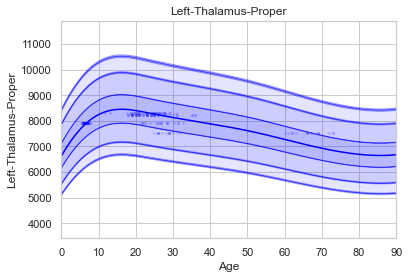

Running IDP 1 Left-Lateral-Ventricle :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([4205.49266088]), 'Rho': array([0.45898577]), 'pRho': array([5.62632393e-25]), 'SMSE': array([0.81397727]), 'EXPV': array([0.19814613])}


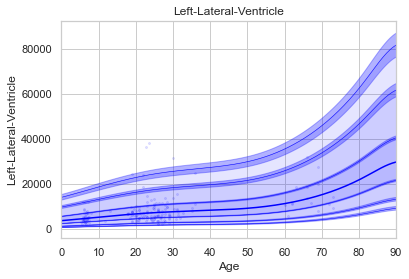

Running IDP 2 rh_MeanThickness_thickness :
Making predictions with dummy covariates (for visualisation)
Loading data ...
Prediction by model  1 of 1
Writing outputs ...
metrics: {'RMSE': array([0.08652435]), 'Rho': array([0.77666469]), 'pRho': array([2.97430261e-103]), 'SMSE': array([0.40227749]), 'EXPV': array([0.59789079])}


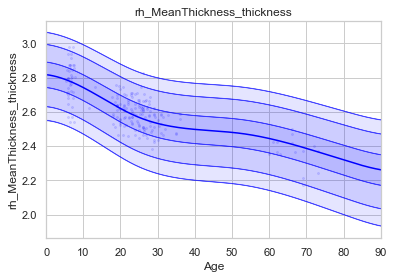

In [149]:
sns.set(style='whitegrid')

for idp_num, idp in enumerate(idp_ids): 
    print('Running IDP', idp_num, idp, ':')
    idp_dir = os.path.join(out_dir, idp)
    os.chdir(idp_dir)
    
    # load the true data points
    yhat_te = load_2d(os.path.join(idp_dir, 'yhat_predict.txt'))
    s2_te = load_2d(os.path.join(idp_dir, 'ys2_predict.txt'))
    y_te = load_2d(os.path.join(idp_dir, 'resp_te.txt'))
            
    # set up the covariates for the dummy data
    print('Making predictions with dummy covariates (for visualisation)')
    yhat, s2 = predict(cov_file_dummy, 
                       alg = 'blr', 
                       respfile = None, 
                       model_path = os.path.join(idp_dir,'Models'), 
                       outputsuffix = '_dummy')
    
    # load the normative model
    with open(os.path.join(idp_dir,'Models', 'NM_0_0_estimate.pkl'), 'rb') as handle:
        nm = pickle.load(handle) 
    
    # get the warp and warp parameters
    W = nm.blr.warp
    warp_param = nm.blr.hyp[1:nm.blr.warp.get_n_params()+1] 
        
    # first, we warp predictions for the true data and compute evaluation metrics
    med_te = W.warp_predictions(np.squeeze(yhat_te), np.squeeze(s2_te), warp_param)[0]
    med_te = med_te[:, np.newaxis]
    print('metrics:', evaluate(y_te, med_te))
    
    # then, we warp dummy predictions to create the plots
    med, pr_int = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param)
    
    # extract the different variance components to visualise
    beta, junk1, junk2 = nm.blr._parse_hyps(nm.blr.hyp, X_dummy)
    s2n = 1/beta # variation (aleatoric uncertainty)
    s2s = s2-s2n # modelling uncertainty (epistemic uncertainty)
    
    # plot the data points
    y_te_rescaled_all = np.zeros_like(y_te)
    for sid, site in enumerate(site_ids_te):
        # plot the true test data points 
        if all(elem in site_ids_tr for elem in site_ids_te):
            # all data in the test set are present in the training set
            
            # first, we select the data points belonging to this particular site
            idx = np.where(np.bitwise_and(X_te[:,2] == sex, X_te[:,sid+len(cols_cov)+1] !=0))[0]
            if len(idx) == 0:
                print('No data for site', sid, site, 'skipping...')
                continue
            
            # then directly adjust the data
            idx_dummy = np.bitwise_and(X_dummy[:,1] > X_te[idx,1].min(), X_dummy[:,1] < X_te[idx,1].max())
            y_te_rescaled = y_te[idx] - np.median(y_te[idx]) + np.median(med[idx_dummy])
        else:
            # we need to adjust the data based on the adaptation dataset 
            
            # first, select the data point belonging to this particular site
            idx = np.where(np.bitwise_and(X_te[:,2] == sex, (df_te['site'] == site).to_numpy()))[0]
            
            # load the adaptation data
            y_ad = load_2d(os.path.join(idp_dir, 'resp_ad.txt'))
            X_ad = load_2d(os.path.join(idp_dir, 'cov_bspline_ad.txt'))
            idx_a = np.where(np.bitwise_and(X_ad[:,2] == sex, (df_ad['site'] == site).to_numpy()))[0]
            if len(idx) < 2 or len(idx_a) < 2:
                print('Insufficent data for site', sid, site, 'skipping...')
                continue
            
            # adjust and rescale the data
            y_te_rescaled, s2_rescaled = nm.blr.predict_and_adjust(nm.blr.hyp, 
                                                                   X_ad[idx_a,:], 
                                                                   np.squeeze(y_ad[idx_a]), 
                                                                   Xs=None, 
                                                                   ys=np.squeeze(y_te[idx]))
        # plot the (adjusted) data points
        plt.scatter(X_te[idx,1], y_te_rescaled, s=4, color=clr, alpha = 0.1)
       
    # plot the median of the dummy data
    plt.plot(xx, med, clr)
    
    # fill the gaps in between the centiles
    junk, pr_int25 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99 = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2), warp_param, percentiles=[0.01,0.99])
    plt.fill_between(xx, pr_int25[:,0], pr_int25[:,1], alpha = 0.1,color=clr)
    plt.fill_between(xx, pr_int95[:,0], pr_int95[:,1], alpha = 0.1,color=clr)
    plt.fill_between(xx, pr_int99[:,0], pr_int99[:,1], alpha = 0.1,color=clr)
            
    # make the width of each centile proportional to the epistemic uncertainty
    junk, pr_int25l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99l = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2-0.5*s2s), warp_param, percentiles=[0.01,0.99])
    junk, pr_int25u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.25,0.75])
    junk, pr_int95u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.05,0.95])
    junk, pr_int99u = W.warp_predictions(np.squeeze(yhat), np.squeeze(s2+0.5*s2s), warp_param, percentiles=[0.01,0.99])    
    plt.fill_between(xx, pr_int25l[:,0], pr_int25u[:,0], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int95l[:,0], pr_int95u[:,0], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int99l[:,0], pr_int99u[:,0], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int25l[:,1], pr_int25u[:,1], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int95l[:,1], pr_int95u[:,1], alpha = 0.3,color=clr)
    plt.fill_between(xx, pr_int99l[:,1], pr_int99u[:,1], alpha = 0.3,color=clr)

    # plot actual centile lines
    plt.plot(xx, pr_int25[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int25[:,1],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int95[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int95[:,1],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int99[:,0],color=clr, linewidth=0.5)
    plt.plot(xx, pr_int99[:,1],color=clr, linewidth=0.5)
    
    plt.xlabel('Age')
    plt.ylabel(idp) 
    plt.title(idp)
    plt.xlim((0,90))
    plt.savefig(os.path.join(idp_dir, 'centiles_' + str(sex)),  bbox_inches='tight')
    plt.show()
    
os.chdir(out_dir)